In [2]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageStat
import numpy as np
import statistics  as stat
import math
from matplotlib.image import imread
import random


import de l'image source :

In [3]:
chemin = r".//Images//lena_color.png"
img = cv2.imread(chemin)

# Partie I
Q1


In [4]:
def AfficherImg(img):
    plt.axis("off")
    # plt.imshow(img, interpolation="nearest")
    plt.imshow(img, cmap = "gray")#palette predefinie pour afficher une image
    plt.show()
# AfficherImg(img)

---
Q2

In [5]:
def ouvrirImage(chemin):
    img=plt.imread(chemin)
    return img
ouvrirImage(chemin)

array([[[0.7490196 , 0.4       , 0.28627452],
        [0.7411765 , 0.39607844, 0.28235295],
        [0.74509805, 0.40392157, 0.2901961 ],
        ...,
        [0.50980395, 0.2784314 , 0.2       ],
        [0.50980395, 0.28235295, 0.21176471],
        [0.50980395, 0.28235295, 0.21176471]],

       [[0.74509805, 0.40392157, 0.28627452],
        [0.7490196 , 0.40784314, 0.2901961 ],
        [0.74509805, 0.40392157, 0.28627452],
        ...,
        [0.52156866, 0.28627452, 0.21176471],
        [0.52156866, 0.29411766, 0.21568628],
        [0.5137255 , 0.28627452, 0.20784314]],

       [[0.7490196 , 0.4117647 , 0.27058825],
        [0.7372549 , 0.40392157, 0.27058825],
        [0.7372549 , 0.40392157, 0.28235295],
        ...,
        [0.5254902 , 0.2901961 , 0.21568628],
        [0.52156866, 0.2901961 , 0.21176471],
        [0.5294118 , 0.29803923, 0.21960784]],

       ...,

       [[0.40392157, 0.28627452, 0.2784314 ],
        [0.4745098 , 0.37254903, 0.36078432],
        [0.52156866, 0

---
Q3

In [6]:
def saveImage(img):
    plt.imsave("outputs//image1.png",img)
# saveImage(img)

 ### 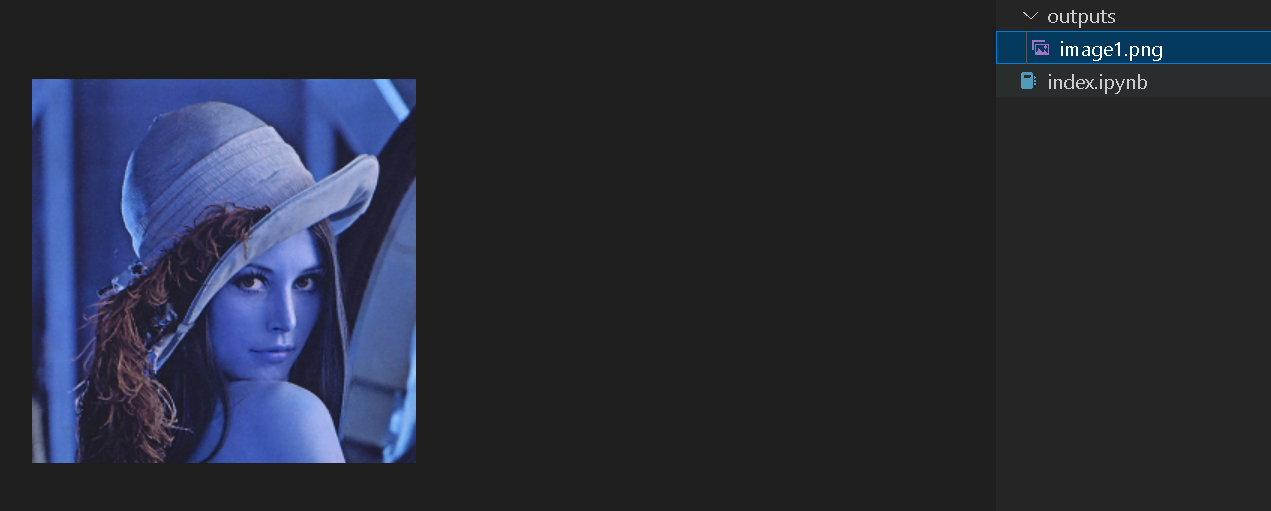 

---
# Partie II. Les images Noir et blanc
Q4

In [7]:
def image_noire(h, l):
    img = np.zeros((h, l, 3), dtype = np.uint8)
    img = 255*img
    return img

# cv2.imshow('image noire', image_noire(200,600))
# cv2.waitKey(0)


---
Q5

In [8]:
def image_blanche(h, l):
    img = np.ones((h, l, 3), dtype = np.uint8)
    img = 255*img
    return img

# cv2.imshow('image blanche', image_blanche(200,600))
# cv2.waitKey(0)

---
Q6

In [9]:

def creerImgBlancNoir(l, h):
	def pixel_value(i, j):
		return (i + j) % 2

	return [[pixel_value(i, j) for j in range(l)] for i in range(h)]

# bw_image = creerImgBlancNoir(7,6)
# plt.imshow(bw_image, cmap='gray')

--- 
Q7

In [10]:
def negatif(Img):
    t=np.array( Img)
    n,p,r=t.shape #on sait que r=3
    for i in range(n):
        for j in range(p):
            for k in range(3):
                t[i][j][k]=255-t[i][j][k]
    return Image.fromarray(t)

# ng = negatif(img)
# ng.save(".//outputs//lena_negative.png") #sauvegarde
# plt.imshow(ng, cmap='gray')

---
# Partie III. Les images en niveau de gris
Q9

In [11]:
def luminance(Img):
    # Open the image file
    im = Image.open(Img)

    # Convert the image to LAB color space
    # lab_image = im.convert("LAB")

    # Retrieve the width and height of the image
    width, height = im.size

    # Calculate the total number of pixels in the image
    total_pixels = width * height
    # Calculate the sum of the L channel values of all the pixels
    total_luminance = 0
    for x in range(width):
        for y in range(height):
            l, a, b = im.getpixel((x, y))
            total_luminance += l

    # Calculate the average luminance of the image
    avg_luminance = total_luminance / total_pixels

    return avg_luminance

luminance(chemin)


132.9369659423828

---
Q10

In [12]:

def constrast(Img):
    im = Image.open(Img)
    # Convert the image to grayscale
    gray_image = im.convert("L")

    # Retrieve the width and height of the image
    width, height = im.size

    # Calculate the total number of pixels in the image
    total_pixels = width * height

    # Calculate the sum of the grayscale values of all the pixels
    total_brightness = 0
    for x in range(width):
        for y in range(height):
            total_brightness += gray_image.getpixel((x, y))

    # Calculate the average brightness of the image
    avg_brightness = total_brightness / total_pixels

    # Calculate the sum of the squared differences between the
    # grayscale values of all the pixels and the average brightness
    total_difference = 0
    for x in range(width):
        for y in range(height):
            total_difference += (gray_image.getpixel((x, y)) - avg_brightness) ** 2

    # Calculate the standard deviation of the grayscale values
    std_dev = (total_difference / total_pixels) ** 0.5

    # Calculate the contrast of the image
    contrast = std_dev / avg_brightness

    return contrast

constrast(chemin)



0.45337344521410083

---
Q11

In [26]:
def profondeur(Img):
    img = Image.open(Img)

    # Récupérez la profondeur de l'image
    depth = len(img.getbands())

    # Affichez la profondeur de l'image
    return depth
    
profondeur(chemin)

3

<h6>Cette fonction prend en paramètre le chemin de l'image (sous forme de chaîne de caractères) et renvoie le type de données utilisé pour représenter chaque pixel de l'image. Le type de données peut être utilisé pour déterminer la profondeur en bits de l'image, en fonction des valeurs possibles pour le type de données. Par exemple, si le type de données renvoyé par la fonction est uint8, cela signifie que chaque pixel est représenté par un entier non signé sur 8 bits, ce qui permet de représenter 256 couleurs différentes.

---
Q12

In [14]:
def Ouvrir(Img):
    # Charger l'image en mémoire en utilisant la fonction imread()
    image = cv2.imread(Img)
    # Vérifier si l'image a été correctement chargée
    if image is None:
        raise ValueError("L'image n'a pas pu être chargée")
    # Convertir l'image en un tableau NumPy et retourner le résultat
    return np.array(image)

# a = Ouvrir(chemin)
# print (a)

---
# Partie IV. Opérations élémentaires sur les images en mode gris
Q13

In [28]:
# Tout d'abord on fait definir la fonction de lecture en grayscale ou RGB et retourne une matrice 
def read_this(img, gray_scale=False):
    image_src = cv2.imread(img)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src


def inverser(img, with_plot=False, gray_scale=False): 
    image_src = read_this(img=img, gray_scale=gray_scale)
    cmap_val = None if not gray_scale else 'gray'
    image_i = cv2.bitwise_not(image_src)
    
    if with_plot:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

        ax1.axis("off")
        ax1.title.set_text('A')

        ax2.axis("off")
        ax2.title.set_text("B")
        
        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_i, cmap=cmap_val)
        return True
    return image_i
# inverser(chemin, with_plot=True)


--- 
Q14

In [16]:
# parametre = le chemin de l'image original
def flipH(img):
    original_img = Image.open(img)
    flippedimage = original_img.transpose(method=Image.FLIP_LEFT_RIGHT)
    return flippedimage

# flipH(chemin)


---
Q15

In [17]:
def poserV(img,img1):
    final_image = np.concatenate((img1, img), axis=0)
    return final_image

# a = poserV(flipH(chemin), inverser(chemin) )
# plt.imshow(a)


---
Q16

In [18]:
def poserH(img, img1):
    final_image = np.concatenate((img1, img), axis= 1 )
    return final_image

# a = poserH(flipH(chemin), inverser(chemin) )
# plt.imshow(a)


---
# Partie VI. Les images RGB


In [19]:
M=[[[210, 100, 255],[100, 50, 255],[90, 90, 255],[90, 90, 255],[90, 90, 255],[90, 80, 255]],
[[190, 255,89],[ 201, 255,29],[200, 255,100],[100, 255,90],[20, 255,200], [100, 255,80]],
[[255,0, 0],[ 255,0, 0],[255,0, 0],[255,0, 0],[255,0, 0], [255,0, 0]] ]

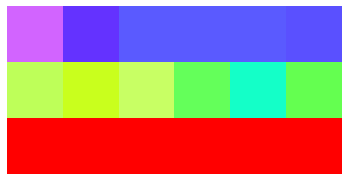

In [20]:

plt.imshow(M)
plt.axis ("off")
plt.show ()

---
Q22

In [21]:
print(M[0][1][1])
print(M[1][0][1])
print(M[2][1][0])

50
255
255


---
Q23

RGB est code en 24 bits <br>
 > justification : la couleur 24 bits est la profondeur de couleur la plus élevée normalement utilisée et est disponible sur la plupart des systèmes d'affichage et logiciels modernes. Sa palette de couleurs contient (2^8)^3 = 256^3 = 16 777 216 couleurs. La couleur 24 bits peut être représentée par six chiffres hexadécimaux.

---
Q24

In [29]:
def initImageRGB(imageRGB):
    #Ouvrez paddington et assurez-vous qu'il s'agit d'un RVB à 3 canaux plutôt que d'une palette
    im = Image.open(imageRGB)

    #Faire de lui un tableau Numpy
    na = np.array(im)

    #Créez un autre tableau Numpy (c'est-à-dire une image) de la même taille que Paddington et plein de nombres aléatoires
    rand = np.random.randint(0,256, na.shape, dtype=np.uint8)

    #Soustraire une image aléatoire de Paddington -ce Numpy vectorisé, rapide et facile à obtenir
    split = na - rand

    #Recréez l'original en ajoutant une image aléatoire à la division -Numpy vectorisé à nouveau
    joined = split + rand
    return joined
    
# a = initImageRGB(chemin)
# Image.fromarray(a).show()


---
Q25

In [30]:

import pylab as pyl
# l'axe horizontal

def symetrie(img):
    imageSource=Image . open (img)
    # la rgeu r e t hauteur en pix el s de l ’image
    largeur , hauteur=imageSource . size
    
    #d é fini ti on de l a nouvelle image
    imageBut=Image .new( "RGB" , ( largeur , hauteur ) )
   
    # pour chaque li gn e :
    for y in range ( hauteur ) :
    #pour chaque colonne :
        for x in range ( largeur ) :
        # code du pix el ( niveau de g ri s )
            p = imageSource . getpixel( ( x , y ) )
            # créa tion du pix el correspondant dans l a nv image :
            imageBut.putpixel(( x,-y + hauteur - 1) ,p )
    return imageBut

# symetrie(chemin).show()

In [24]:
# # verticallement
# def symetrieV(img):
#     imageSource=Image . open (img)
#     # largeur et hauteur en pixels de l’image
#     largeur , hauteur=imageSource . size
    
#     #définition de la nouvelle image
#     imageBut=Image .new( "RGB" , ( largeur , hauteur ) )
   
#     # pour chaque ligne :
#     for y in range ( hauteur ) :
#     #pour chaque colonne :
#         for x in range ( largeur ) :
#         # code du pixel ( niveau de g ri s )
#             p = imageSource . getpixel( ( x , y ) )
#             # création du pixel correspondant dans la nv image :
#             imageBut.putpixel(( -x + hauteur -1 ,y) ,p )
#     return imageBut

# # symetrieV(chemin).show()

---
Q26

In [40]:

def grayscale(imageRGB):
    # charger l'image
    img = Image.open(imageRGB)
    # convertir l'image en tableau de pixels
    pixels = img.load()
    # parcourir chaque pixel de l'image
    for i in range(img.width):
        for j in range(img.height):
            # récupérer les valeurs RGB du pixel
            r, g, b = pixels[i, j]
            # calculer la valeur grise en utilisant la formule indiquée
            gray = (min(r, g, b) + max(r, g, b)) // 2
            # remplacer la valeur RGB du pixel par la valeur grise
            pixels[i, j] = (gray, gray, gray)
    return img


# image_gris=grayscale(chemin)
# image_gris.save(".//outputs//image_gris.png") #sauvegarde
# image_gris.show() #affichage
